In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pprint import pprint
import folium
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from collections import Counter
import json


In [2]:
class airbnb_city:
    
    def __init__(self, csv):
        
        self.csv = csv
                
        self.df_city = pd.read_csv(self.csv)
        
        print("Instance created!")
        
    def clean_columns(self):
        
        # Take only the relevant columns in the dataframe
        
        l_relevant_columns = ["host_is_superhost","neighbourhood_cleansed","neighbourhood_group_cleansed","property_type","room_type","accommodates","bathrooms_text","beds","price","minimum_nights","maximum_nights","availability_30","availability_365","number_of_reviews","instant_bookable", "amenities", "host_verifications"]

        self.df_city = self.df_city[l_relevant_columns]
        
        self.df_city["bathrooms_text"].replace(np.nan, "?", inplace = True)
        
        # Get numbers out of bathroom_text columns
        
        l_nums = [re.findall(r'\d+',i) for i in self.df_city["bathrooms_text"].values]

        l_nums_completed = []

        for i in l_nums:

            if len(i) > 1:

                l_nums_completed.append('.'.join(i))

            elif len(i) == 0:

                l_nums_completed.append('0')

            else:

                l_nums_completed.append(i[0])

        # Separate categories from bathroom_text
        
        l_category = []

        for i in self.df_city["bathrooms_text"].values:

            if "shared" in i:

                l_category.append("Shared")

            elif "private" in i:

                l_category.append("Private")

            else:

                l_category.append("Unknown")
                
        # Create two different columns replacing bathroom_text
        
        self.df_city.drop("bathrooms_text", axis = 1, inplace = True)
                
        self.df_city["num_of_baths"] = l_nums_completed
        
        self.df_city["bath_category"] = l_category
        
        self.df_city["num_of_baths"] = self.df_city["num_of_baths"].astype("float64")

        # Column["prices"]
        
        self.df_city["price"]  = self.df_city["price"] .apply(lambda x: float(x.strip("$").replace(',', '')) if pd.notnull(x) else x)
        
        self.df_city["amenities"] = [len(i) for i in self.df_city["amenities"]]

        self.df_city["host_verifications"] = [len(i) for i in self.df_city["host_verifications"]]
        
        
        print("Dataframe sucessfully created!")
    
    def label_encoding(self):
        
        self.df_city.dropna(inplace=True)
        
        # Encoding columns with dummies function
        
        def dummies(data, column):
            return pd.get_dummies(data = data[column], drop_first=True)
        
        self.df_city["host_is_superhost"] = dummies(self.df_city, "host_is_superhost")
        self.df_city["instant_bookable"] = dummies(self.df_city, "instant_bookable")
        
        df_room_type = dummies(self.df_city, "room_type")
        df_bath_category = dummies(self.df_city, "bath_category")
        df_bath_category = df_bath_category.rename(columns={'Shared': 'shared_bath', 'Unknown': 'unknoun_bath'})
        
        self.df_city = pd.concat([self.df_city, df_bath_category], axis = 1)

        self.df_city = pd.concat([self.df_city, df_room_type], axis = 1)

        self.df_city.drop("room_type", axis = 1, inplace = True)

        self.df_city.drop("bath_category", axis = 1, inplace = True)
        
        # Encoding categorical columns with labelEncoding function
        
        l_columns_to_labelEncode = ["neighbourhood_cleansed", "property_type", "neighbourhood_group_cleansed"]
        l_columns_encoded = list()

        for i in l_columns_to_labelEncode:

            # Inicializing object LabelEncoder()
            o_labelEncoding = LabelEncoder()

            # Training it with the column data
            o_labelEncoding.fit(self.df_city[i].values)

            # Transform the column
            l_columns_encoded.append(o_labelEncoding.transform(self.df_city[i].values))

        self.df_city["neighbourhood_cleansed"] = l_columns_encoded[0]
        self.df_city["property_type"] = l_columns_encoded[1]
        self.df_city["neighbourhood_group_cleansed"] = l_columns_encoded[2]
        
        print("Dataframe sucessfully encoded!")

        
    def return_df(self):
    
        return self.df_city
    
    def display_df(self):
    
        display(self.df_city)

In [3]:
madrid = airbnb_city("datasets/Madrid air bnb/listings_detailed.csv")

Instance created!


In [7]:
df_madrid = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/madrid.csv")
df_barcelona = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/barcelona.csv")
df_berlin = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/sevilla.csv")
df_paris = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/paris.csv")
df_amsterdam = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/amsterdam.csv")
df_milan = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/milan.csv")
df_rome = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/rome.csv")
df_lisbon = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/lisbon.csv")
df_porto = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/porto.csv")
df_copenhagen = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/copenhagen.csv")
df_dublin = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/dublin.csv")
df_manchester = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/manchester.csv")
df_oslo = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/oslo.csv")
df_london = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/london.csv")
df_ireland = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/ireland.csv")
df_geneva = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/geneva.csv")
df_athens = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/athens.csv")
df_vienna = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/vienna.csv")
df_sicilia = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/sicilia.csv")
df_rotterdam = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/rotterdam.csv")
df_stockholm = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/stockholm.csv")
df_naples = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/naples.csv")
df_florence = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/florence.csv")
df_munich = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/munich.csv")
df_venice = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/venice.csv")
df_malaga = pd.read_csv("/Users/jacob/Library/Mobile Documents/com~apple~CloudDocs/hackaboss/datasets/malaga.csv")

#l_coms = [df_madrid,df_barcelona,df_paris,df_london,df_milan,df_rome,df_geneva]
l_coms = [df_madrid, 
          df_barcelona,
          df_paris,
          df_london,
          df_amsterdam,
          df_rome,
          df_dublin,
          df_geneva,
          df_athens,
          df_oslo]

for i in l_coms:
    
    i.drop("source", axis = 1, inplace = True)
    
df = pd.DataFrame()

df = df.append(l_coms, ignore_index=True)

/var/folders/10/5nbnv2696vlgb605wf3g6wwh0000gn/T/ipykernel_6452/215042469.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(l_coms, ignore_index=True)


In [8]:
# df = madrid.return_df()

In [10]:
%%time

import json
l_amenities_cleaned, l_amenities_sublisted = list(),list()
for i in df["amenities"]:
    
    l_amenities_sublisted.append(json.loads(i))
    
    for j in json.loads(i):
    
        l_amenities_cleaned.append(j)

CPU times: user 2.68 s, sys: 436 ms, total: 3.12 s
Wall time: 3.21 s


In [12]:
l_amenities_cleaned

['Coffee maker',
 'Dishwasher',
 'Cleaning products',
 'Bed linens',
 'Toaster',
 'Fast wifi – 274 Mbps',
 'Central heating',
 'Ceiling fan',
 'Dishes and silverware',
 'Shampoo',
 'Luggage dropoff allowed',
 'Hot water',
 'Shared patio or balcony',
 'Long term stays allowed',
 'Wine glasses',
 'Clothing storage: closet',
 'Freezer',
 'Elevator',
 'Hair dryer',
 'Hot water kettle',
 'Paid street parking off premises',
 'Free washer – In unit',
 'Body soap',
 'Oven',
 'Cooking basics',
 'Outdoor furniture',
 'Dedicated workspace',
 'Hangers',
 'Extra pillows and blankets',
 'Microwave',
 'AC - split type ductless system',
 'Kitchen',
 'Rice maker',
 'Essentials',
 'Iron',
 'Pocket wifi',
 'Refrigerator',
 'Wifi',
 'Coffee maker',
 'Bed linens',
 'Washer',
 'Air conditioning',
 'Dishes and silverware',
 'Heating',
 'Shampoo',
 'Hot water',
 'Long term stays allowed',
 'Lock on bedroom door',
 'Elevator',
 'TV',
 'Hair dryer',
 'First aid kit',
 'Oven',
 'Cooking basics',
 'Free parking o

In [9]:
%%time

import json
l_amenities_cleaned, l_amenities_sublisted = list(),list()
for i in df["amenities"]:
    
    l_amenities_sublisted.append(json.loads(i))
    
    for j in json.loads(i):
    
        l_amenities_cleaned.append(j)

l_values = list(Counter(l_amenities_cleaned).values())
l_keys = list(Counter(l_amenities_cleaned).keys())

l_valuable_amenities, l_not_relevant_amenities = [], []

for i in l_values:
    
    if i > 10000:
        
        l_valuable_amenities.append(l_keys[l_values.index(i)])
        
    else:
        
        l_not_relevant_amenities.append(l_keys[l_values.index(i)])
        
cont = 0
l_popular, l_exclusive = [],[]

for i in l_amenities_sublisted:
    
    for j in l_valuable_amenities:
        
        if j in i:
            
            cont+=1
        
    if cont > len(i)/2:

        l_popular.append(1)

    else:

        l_popular.append(0)

    cont = 0
        
    for k in l_not_relevant_amenities:
        
        if k in i:
            
            cont += 1
            
    if cont > len(i)/2:

        l_exclusive.append(1)

    else:

        l_exclusive.append(0)
            
    cont = 0
    
df["popular_amenities"] = l_popular
df["exclusive_amenities"] = l_exclusive

KeyboardInterrupt: 

# Markdown reserved

In [6]:
df_columns_chosen = df[["minimum_nights", "popular_amenities","exclusive_amenities","property_type", "room_type", "neighbourhood_group_cleansed","latitude", "longitude", "number_of_reviews", "price","reviews_per_month","beds","calculated_host_listings_count", "accommodates"]]

In [8]:
df_columns_chosen = df_columns_chosen[df_columns_chosen["price"] < 700]

In [9]:
df_columns_chosen

,minimum_nights,popular_amenities,exclusive_amenities,property_type,room_type,neighbourhood_group_cleansed,latitude,longitude,number_of_reviews,price,reviews_per_month,beds,calculated_host_listings_count,accommodates
0,1,1,0,Private room in apartment,Private room,Chamartín,40.45724,-3.67688,78,60.0,0.58,1.0,1,2
1,4,1,0,Private room in apartment,Private room,Latina,40.40381,-3.74130,33,31.0,0.42,1.0,2,1
2,15,0,1,Entire apartment,Entire home/apt,Arganzuela,40.38840,-3.69511,0,50.0,NaN,5.0,7,6
3,5,1,0,Entire apartment,Entire home/apt,Centro,40.42183,-3.70529,10,92.0,0.13,1.0,1,3
4,2,1,0,Private room in house,Private room,Arganzuela,40.38975,-3.69018,149,26.0,1.12,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,30,1,0,Private room in apartment,Private room,Centro,40.40756,-3.69937,0,23.0,NaN,1.0,8,1
19614,30,1,0,Private room in apartment,Private room,Chamberí,40.43706,-3.71364,0,21.0,NaN,1.0,8,1
19615,7,0,0,Private room in apartment,Private room,Chamberí,40.43857,-3.70715,0,22.0,NaN,1.0,8,1
19616,30,0,0,Private room in apartment,Private room,Salamanca,40.43027,-3.66759,0,19.0,NaN,1.0,8,1


In [10]:
df_columns_chosen = df_columns_chosen.dropna()

In [11]:
df_columns_chosen.reset_index(drop = True, inplace = True)

In [7]:
df_columns_chosen["price"] = df_columns_chosen["price"].apply(lambda x: float(x.strip("$").replace(',', '')) if pd.notnull(x) else x).values

/var/folders/10/5nbnv2696vlgb605wf3g6wwh0000gn/T/ipykernel_2947/1023210409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns_chosen["price"] = df_columns_chosen["price"].apply(lambda x: float(x.strip("$").replace(',', '')) if pd.notnull(x) else x).values


/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


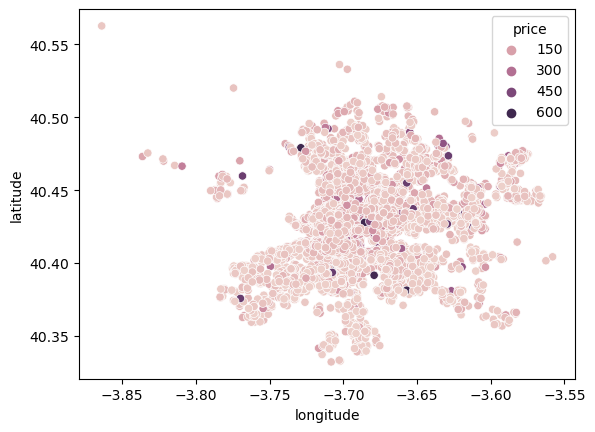

In [12]:
    sns.scatterplot(df_columns_chosen['longitude'], df_columns_chosen['latitude'],
                    hue=df_columns_chosen['price']);

In [ ]:
# len(json.loads(df["amenities"].values[0]))

In [ ]:
# for enum, i in enumerate(df["amenities"].values):
    
#     df_columns_chosen["amenities"].values[enum] = json.load(i)

In [ ]:
# a = df_columns_chosen["amenities"].explode()
# a[:] = a.factorize()[0]
# df_columns_chosen['amenities'] = a.groupby(level=0).agg(list)

In [ ]:
dict_property_types = dict(Counter(df_columns_chosen["property_type"]))

list_others = []
for i in dict_property_types.keys():
    
    if dict_property_types[i] < 300:
        
        list_others.append(i)
        
for i in list_others:
    
    df_columns_chosen["property_type"].replace(i,"Other", inplace = True)

In [ ]:
Counter(df_columns_chosen["property_type"])

In [ ]:
df_columns_chosen

In [ ]:
l_lbencode = ["property_type","neighbourhood_group_cleansed"]
for i in l_lbencode:

    # Inicializing object LabelEncoder()
    o_labelEncoding = LabelEncoder()

    # Training it with the column data
    o_labelEncoding.fit(df_columns_chosen[i].values)

    # Transform the column
    df_columns_chosen[i] = o_labelEncoding.transform(df_columns_chosen[i].values)

In [ ]:
df_columns_chosen

In [ ]:
df_columns_chosen = df_columns_chosen[df_columns_chosen["price"] < 100]

In [ ]:
df_columns_chosen.reset_index(drop=True,inplace=True)

In [ ]:
df_columns_chosen

In [ ]:
sns.countplot(df["accommodates"])

In [ ]:
for i in df["accommodates"].values:
    
    if i > 8:
        
        df["accommodates"].replace(i,9, inplace = True)
        
    elif i == 0:
        
        df["accommodates"].replace(i,1, inplace = True)

        

In [ ]:
sns.countplot(df["accommodates"])

In [ ]:
def dummies(data, column):
    return pd.get_dummies(data = data[column], drop_first=True)

df_room_type = dummies(df_columns_chosen, "room_type")
df_columns_chosen = pd.concat([df_columns_chosen, df_room_type], axis = 1)
df_columns_chosen.drop("room_type", axis = 1, inplace = True)

In [ ]:





df_columns_chosen

# Getting rid of outliers using quantiles

In [ ]:
# cols = df_columns_chosen.columns

# # cols = cols.tolist()

# # cols.remove("amenities")

# cols
# for col in cols:
#     upper_bound = df_columns_chosen[col].quantile(0.95)
#     lower_bound = df_columns_chosen[col].quantile(0.05)
#     listings = df_columns_chosen[df_columns_chosen[col] < upper_bound]
#     listings = df_columns_chosen[df_columns_chosen[col] > lower_bound]

In [ ]:
# # Plot before transformation
# stats.probplot(df_columns_chosen["price"], plot=plt)

# # Power Transformer
# numeric_cols = list(df_columns_chosen._get_numeric_data().columns)
# pt = PowerTransformer(method="yeo-johnson")
# df_columns_chosen[numeric_cols] = pt.fit_transform(df_columns_chosen[numeric_cols])

In [ ]:
# After transformation
# stats.probplot(df_columns_chosen["price"], plot=plt)

## Dividing x & y

In [ ]:
X = df_columns_chosen.drop("price", axis = 1)
y = df_columns_chosen[["price"]]

## Scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_x.fit(X)
X = scaler_x.transform(X)


scaler_y = StandardScaler()
scaler_y.fit(y)
y = scaler_y.transform(y)

## Feature importances

In [ ]:
df_class = df_columns_chosen["price"].copy()

df_columns_chosen.drop("price", axis = 1, inplace = True)

X = np.asarray(df_columns_chosen)
y = np.asarray(df_class)

In [ ]:
X.shape, y.shape

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators = 250,
                              random_state = 0)

forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], df_columns_chosen.columns[f]))

# Plot the feature importances of the forest
plt.figure()

plt.title("Feature importances")

plt.bar(range(X.shape[1]), importances[indices], color = "r", yerr = std[indices], align = "center")

plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## 1. LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print(f"Train data: {X_train.shape, y_train.shape}")
print(f"Test data: {X_test.shape, y_test.shape}")

In [ ]:
# Regresión algorithm

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Finding coef

print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

## Predicción

In [ ]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

## Metrics

In [ ]:
# Sklearn tiene las formulas de algunas métricas en funciones.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [ ]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

In [ ]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = scaler_y.inverse_transform([y_test]).flatten()
df_pred["yhat"] = scaler_y.inverse_transform([yhat]).flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

In [ ]:
df_pred.tail(20)

In [ ]:
# Distance btw real and predicted values

plt.figure(figsize = (8, 5))

sns.scatterplot(x = y_test.flatten(), y = yhat.flatten(), alpha = 0.5, color = "blue")

plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)

plt.show()

# 2. KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 7)

model.fit(X_train, y_train)

yhat = model.predict(X_test)

yhat

In [ ]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

# 3. DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

yhat = model.predict(X_test)

yhat

In [ ]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

# 4. RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs= -1 )
model.fit(X_train, y_train)

yhat = model.predict(X_test)

yhat

In [ ]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")



In [ ]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = scaler_y.inverse_transform([y_test]).flatten()
df_pred["yhat"] = scaler_y.inverse_transform([yhat]).flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

In [ ]:
df_pred.tail(20)

In [ ]:
# Distance btw real and predicted values

plt.figure(figsize = (8, 5))

sns.scatterplot(x = y_test.flatten(), y = yhat.flatten(), alpha = 0.5, color = "blue")

plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)

plt.show()

# 4. AdaBoostRegressor

In [ ]:
# %%time 

# from sklearn.ensemble import AdaBoostRegressor

# model = AdaBoostRegressor(RandomForestRegressor(n_estimators=200, n_jobs= -1, max_depth=20),
#                           n_estimators = 200)
# model.fit(X_train, y_train)

# yhat = model.predict(X_test)

# yhat

In [ ]:
# print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
# print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
# print(f"R**2:\t {r2_score(yhat, y_test)}")
# print(f"RAE:\t {RAE}")
# print(f"RSE:\t {RSE}")
# print(f"Adjusted R**2:\t {r2_ajustada}")

## LGBM


In [ ]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(max_depth=10, num_leaves=20, random_state=0)
model.fit(X_train, y_train)

yhat = model.predict(X_test)

yhat

In [ ]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")
